In [1]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [2]:
data_path = 'data'

In [3]:
data = pd.read_csv(join(data_path, 'train.csv'), parse_dates=['Date_round'])
# data = data.sample(n=10000)
data.isna().sum(axis=0).Perf_1Y/data.shape[0]

0.02935743492866544

In [4]:
cnt = data.groupby('RanksID').count()['Date_round']

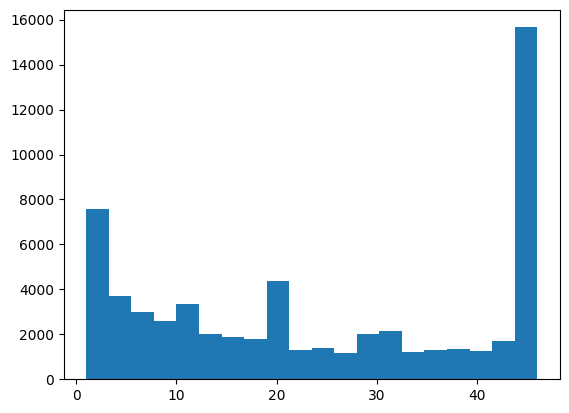

In [5]:
plt.hist(cnt,bins=20);

In [6]:
for th in [0, 1, 2, 5, 10, 20, 30, 40, 50]:
       print(f'th: {th}, '
             f'groups_num: {cnt[cnt > th].shape[0]}, '
             f'ratio: {round(cnt[cnt > th].shape[0]/cnt.shape[0], 4)}')

th: 0, groups_num: 60671, ratio: 1.0
th: 1, groups_num: 57685, ratio: 0.9508
th: 2, groups_num: 55216, ratio: 0.9101
th: 5, groups_num: 49413, ratio: 0.8144
th: 10, groups_num: 42753, ratio: 0.7047
th: 20, groups_num: 31133, ratio: 0.5131
th: 30, groups_num: 24587, ratio: 0.4053
th: 40, groups_num: 17990, ratio: 0.2965
th: 50, groups_num: 0, ratio: 0.0


In [8]:
data = data[~data.Perf_1Y.isna()]
data.isna().sum(axis=0).Perf_1Y/data.shape[0]

0.0

In [11]:
missing_values = data.isna().sum(axis=0)/data.shape[0]
missing_values.sort_values()

Date_round                                   0.000000
RanksID                                      0.000000
Perf_1Y                                      0.000000
Country_of_Headquarters                      0.040545
Price_To_Tangible_Book_Value_Per_Share       0.115976
C_Price_To_Tangible_Book_Value_Per_Share     0.115976
Price_To_Book_Value_Per_Share                0.116038
C_Price_To_Book_Value_Per_Share              0.116038
Enterprise_Value_to_Sales                    0.158923
Price_To_Sales_Per_Share                     0.158958
Company_Shares                               0.171928
MCap_group                                   0.172405
Enterprise_Value                             0.180746
gicsSectorName                               0.190805
gicsIndustryGroupName                        0.190805
gicsIndustryName                             0.190805
gicsSubIndustryName                          0.190805
Free_Cash_Flow_net_of_Dividends_per_Share    0.254497
C_Price_to_FCF_net_of_Divide

In [12]:
tmp = missing_values.sort_values()
tmp[tmp<0.4].index.to_list()

['Date_round',
 'RanksID',
 'Perf_1Y',
 'Country_of_Headquarters',
 'Price_To_Tangible_Book_Value_Per_Share',
 'C_Price_To_Tangible_Book_Value_Per_Share',
 'Price_To_Book_Value_Per_Share',
 'C_Price_To_Book_Value_Per_Share',
 'Enterprise_Value_to_Sales',
 'Price_To_Sales_Per_Share',
 'Company_Shares',
 'MCap_group',
 'Enterprise_Value',
 'gicsSectorName',
 'gicsIndustryGroupName',
 'gicsIndustryName',
 'gicsSubIndustryName',
 'Free_Cash_Flow_net_of_Dividends_per_Share',
 'C_Price_to_FCF_net_of_Dividends_per_Share',
 'Enterprise_Value_to_EBITDA',
 'Enterprise_Value_to_Operating_Cash_Flow',
 'Price_to_Cash_Flow_per_Share',
 'P_to_E']

In [13]:
valid_columns = ['Date_round', 'RanksID', 'Perf_1Y', 'Country_of_Headquarters',
       'Price_To_Tangible_Book_Value_Per_Share',
       'C_Price_To_Tangible_Book_Value_Per_Share',
       'Price_To_Book_Value_Per_Share', 'C_Price_To_Book_Value_Per_Share',
       'Enterprise_Value_to_Sales', 'Price_To_Sales_Per_Share',
       'Company_Shares', 'MCap_group', 'Enterprise_Value', 'gicsSectorName',
       'gicsIndustryGroupName', 'gicsIndustryName', 'gicsSubIndustryName',
       'Free_Cash_Flow_net_of_Dividends_per_Share',
       'C_Price_to_FCF_net_of_Dividends_per_Share',
       'Enterprise_Value_to_EBITDA', 'Enterprise_Value_to_Operating_Cash_Flow',
       'Price_to_Cash_Flow_per_Share', 'P_to_E']

gics_names = ['gicsSectorName', 'gicsIndustryGroupName','gicsIndustryName','gicsSubIndustryName']

useless_columns = ['MCap_group']

util_columns = ['Date_round', 'RanksID', 'Perf_1Y']
cat_columns = gics_names + ['Country_of_Headquarters']
reg_columns = [el for el in valid_columns if el not in useless_columns + cat_columns + util_columns]

In [14]:
data = data[util_columns + cat_columns + reg_columns]

In [15]:
%%time
missing_ratio = data.groupby('RanksID').agg(lambda x: x.isna().sum(axis=0)/x.shape[0])
missing_ratio

CPU times: user 3min 11s, sys: 3.74 s, total: 3min 15s
Wall time: 3min 28s


,Date_round,Perf_1Y,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName,Country_of_Headquarters,Price_To_Tangible_Book_Value_Per_Share,C_Price_To_Tangible_Book_Value_Per_Share,Price_To_Book_Value_Per_Share,...,Enterprise_Value_to_Sales,Price_To_Sales_Per_Share,Company_Shares,Enterprise_Value,Free_Cash_Flow_net_of_Dividends_per_Share,C_Price_to_FCF_net_of_Dividends_per_Share,Enterprise_Value_to_EBITDA,Enterprise_Value_to_Operating_Cash_Flow,Price_to_Cash_Flow_per_Share,P_to_E
RanksID,,,,,,,,,,,,,,,,,,,,,
000001.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088889,0.088889,0.088889,0.088889,0.000000,0.222222,0.222222,0.000000
000002.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.021739,0.021739,...,0.000000,0.021739,0.086957,0.086957,0.000000,0.000000,0.000000,0.326087,0.347826,0.021739
000004.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.095238,0.095238,0.000000,0.000000,0.238095,0.309524,0.309524,0.333333
000005.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.081081,0.081081,0.000000,0.000000,0.675676,0.567568,0.567568,0.513514
000006.SZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.046512,0.046512,0.000000,0.000000,0.023256,0.441860,0.441860,0.023256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ.TO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
ZZ^C13,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.190476,0.190476,0.190476,...,0.190476,0.190476,0.190476,0.190476,1.000000,1.000000,0.190476,0.190476,0.190476,0.428571
ZZb.ST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064516,0.064516,0.064516,...,0.064516,0.064516,0.258065,0.258065,0.064516,0.064516,0.064516,0.096774,0.096774,0.064516


In [16]:
std = np.std(missing_ratio, axis=0)
full_missing_ratio = missing_ratio[missing_ratio == 1].count()/missing_ratio.shape[0]
pd.DataFrame({'std':std, 'fmr': full_missing_ratio})

,std,fmr
Date_round,0.000000,0.000000
Perf_1Y,0.000000,0.000000
gicsSectorName,0.464710,0.315488
gicsIndustryGroupName,0.464710,0.315488
gicsIndustryName,0.464710,0.315488
gicsSubIndustryName,0.464710,0.315488
Country_of_Headquarters,0.196098,0.040059
Price_To_Tangible_Book_Value_Per_Share,0.371134,0.160356
C_Price_To_Tangible_Book_Value_Per_Share,0.371134,0.160356
Price_To_Book_Value_Per_Share,0.371144,0.160373


In [17]:
bad_groups = set(missing_ratio[missing_ratio.gicsSectorName == 1].index)
mask = data.RanksID.apply(lambda x: x not in bad_groups)
data.loc[~mask, gics_names] = 'unk'

bad_groups = set(missing_ratio[missing_ratio.Country_of_Headquarters == 1].index)
mask = data.RanksID.apply(lambda x: x not in bad_groups)
data.loc[~mask, 'Country_of_Headquarters'] = 'unk'

In [18]:
data.head()

,Date_round,RanksID,Perf_1Y,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName,Country_of_Headquarters,Price_To_Tangible_Book_Value_Per_Share,C_Price_To_Tangible_Book_Value_Per_Share,...,Enterprise_Value_to_Sales,Price_To_Sales_Per_Share,Company_Shares,Enterprise_Value,Free_Cash_Flow_net_of_Dividends_per_Share,C_Price_to_FCF_net_of_Dividends_per_Share,Enterprise_Value_to_EBITDA,Enterprise_Value_to_Operating_Cash_Flow,Price_to_Cash_Flow_per_Share,P_to_E
0,2007-04-01,000001.SZ,0.625184,Financials,Banks,Banks,Diversified Banks,China,5.996060,5.996060,...,0.392742,3.044071,1.945822e+09,613.182382,0.192733,3.525908,2.013798,0.411956,3.192994,27.902073
1,2007-04-01,000002.SZ,1.390464,Real Estate,Real Estate,Real Estate Management & Development,Real Estate Development,China,4.856243,4.856243,...,4.309279,4.045947,4.369899e+09,9989.273816,-0.058324,-15.332860,22.403075,NaN,NaN,28.617278
2,2007-04-01,000004.SZ,0.472222,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,Biotechnology,China,9.448818,9.448818,...,13.563795,14.224793,8.397668e+07,78.937014,0.010166,96.968115,NaN,12.741018,13.361920,NaN
3,2007-04-01,000005.SZ,0.623501,Industrials,Capital Goods,Construction & Engineering,Construction & Engineering,China,5.022465,5.022465,...,16.302346,15.358493,9.143336e+08,743.292317,0.000582,1314.996502,NaN,241.367037,227.392663,NaN
4,2007-04-01,000006.SZ,0.800092,Real Estate,Real Estate,Real Estate Management & Development,Real Estate Development,China,2.510317,2.510317,...,3.625182,2.878464,2.535916e+08,588.363454,-0.055041,-6.287248,15.040551,6.141771,5.025410,16.698514


In [19]:
%%time
t = data.sort_values(['RanksID', 'Date_round'])

CPU times: user 1.37 s, sys: 349 ms, total: 1.72 s
Wall time: 2 s


In [20]:
%%time
t = t.groupby('RanksID').agg(lambda x: x.interpolate(method='pad', limit_area='inside').tolist())

CPU times: user 6min 28s, sys: 13.3 s, total: 6min 41s
Wall time: 7min 51s


In [21]:
%%time
t = t.apply(pd.Series.explode).reset_index()

CPU times: user 5.07 s, sys: 2.3 s, total: 7.36 s
Wall time: 9.2 s


In [23]:
%%time
cols = reg_columns
nan_mask = t[cols].isna()
mean_by_days = t[cols + ['Date_round']].groupby('Date_round').mean()

clear_data = t[cols].copy()
clear_data[nan_mask] = t[cols  + ['Date_round']].apply(lambda x: mean_by_days.loc[x.Date_round], axis=1)[cols]
clear_data = pd.merge(clear_data, t[['Date_round', 'RanksID', 'Perf_1Y'] + cat_columns], left_index=True, right_index=True)

CPU times: user 4min 30s, sys: 13.3 s, total: 4min 43s
Wall time: 5min


In [24]:
clear_data.isna().sum()

Price_To_Tangible_Book_Value_Per_Share       0
C_Price_To_Tangible_Book_Value_Per_Share     0
Price_To_Book_Value_Per_Share                0
C_Price_To_Book_Value_Per_Share              0
Enterprise_Value_to_Sales                    0
Price_To_Sales_Per_Share                     0
Company_Shares                               0
Enterprise_Value                             0
Free_Cash_Flow_net_of_Dividends_per_Share    0
C_Price_to_FCF_net_of_Dividends_per_Share    0
Enterprise_Value_to_EBITDA                   0
Enterprise_Value_to_Operating_Cash_Flow      0
Price_to_Cash_Flow_per_Share                 0
P_to_E                                       0
Date_round                                   0
RanksID                                      0
Perf_1Y                                      0
gicsSectorName                               0
gicsIndustryGroupName                        0
gicsIndustryName                             0
gicsSubIndustryName                          0
Country_of_He

In [24]:
t.isna().sum()

RanksID                                           0
Date_round                                        0
Perf_1Y                                           0
gicsSectorName                               274113
gicsIndustryGroupName                        274113
gicsIndustryName                             274113
gicsSubIndustryName                          274113
Country_of_Headquarters                       58247
Price_To_Tangible_Book_Value_Per_Share       165647
C_Price_To_Tangible_Book_Value_Per_Share     165647
Price_To_Book_Value_Per_Share                165740
C_Price_To_Book_Value_Per_Share              165740
Enterprise_Value_to_Sales                    216962
Price_To_Sales_Per_Share                     216628
Company_Shares                               125413
Enterprise_Value                             138377
Free_Cash_Flow_net_of_Dividends_per_Share    352638
C_Price_to_FCF_net_of_Dividends_per_Share    353015
Enterprise_Value_to_EBITDA                   350858
Enterprise_V

In [25]:
clear_data.to_csv(join(data_path, 'clear_data.csv'), index=False)